Preparation and visualisation of **metadata**. © 2022 Kajetan Chrapkiewicz.

##### Notebook setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Introduction

In [ ]:
binary+metadata

Handling seismic datasets can pose some challenge as they are usually stored in binary formats in order to:
- save disk space,
- allow for efficient I/O operations.

Reading binary files requires prior knowledge about their format: type of data stored and the file-structure. Additionally, seismic data, in order to be meaningful, needs associated metadata on its acquisition, at the very least positions and types of the sources and receivers.

For these reason, standarised binary file formats were established, e.g. `SEGY`. Here, we assume that:
- the dataset is saved on disk in multiple SEGY files,
- all metadata that can be put in standard SEGY header words has been already put there

In this example, the header metadata were scraped from SEGY headers of all receiver-gathers and put into a single `csv` file:





In [4]:
fname = 'data/proteus_metadata.csv'

We can read this file using `Pandas`:

In [6]:
md = pd.read_csv(fname)

The problem at hand, is how to attach additional information to already filled-in `SEGY` files. The solution proposed here, instead of introducing new file formats such as `ASDF` (https://seismic-data.org/), uses  `Pandas` data frames stored on disk as lightweight `csv` files. This has an advantage of parsing `Excel` spreadsheets which are commonly in use by seismologists to report on data quality.

# Static plots

#### Selected shot line


In [9]:
tracf = 4104
df = md[md.tracf==tracf]
eps = sorted(list(df['ep'].unique()))
print('All shot-line numbers for station %s: %s' % (tracf, eps))

All shot-line numbers for station 4104: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


CPU times: user 44 ms, sys: 4 ms, total: 48 ms
Wall time: 37 ms


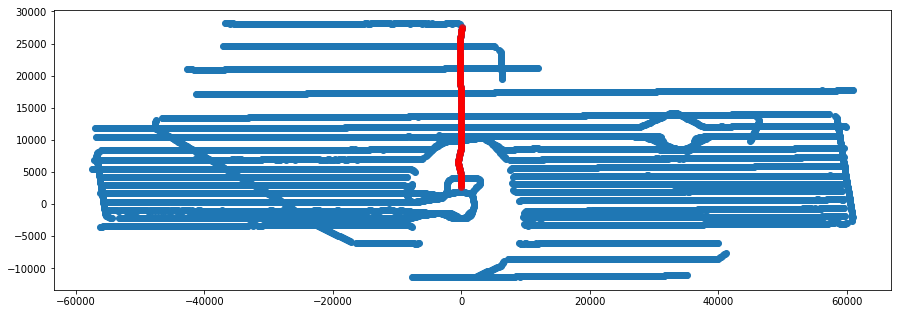

In [24]:
%%time 
ep = 32
plt.figure(figsize=(15,8))
plt.scatter(df['sx'], df['sy']) #, c=df['ep'])
# plt.colorbar()
line = df[df.ep == ep]
plt.scatter(line['sx'], line['sy'], c='r', alpha=.5)
plt.gca().set_aspect('equal')

#### Shooting direction of a given shot line


In [22]:
from fullwavepy.utils import find_shoot_dir
find_shoot_dir(32, md)

'left_to_right'

# Interactive plots

#### Fig.
Interactive plot of a specific header word.

In [4]:
# code 
# @interact(sid=md.tracf.unique(), attr=md.columns) # attr=Dropdown(options=md.columns), value=md.columns[3])
# def _(sid, attr):
#     df = md[md.tracf==sid]
#     fig = px.scatter(df, x='sx', y='sy', color=attr)
# #     fig = px.scatter(df, x='gx', y='gy')
#     fig.show(renderer="notebook")

#### Fig.
Interactive highlighter of a shot line.

In [8]:
# code 
df = md[md.tracf==4104]
eps = sorted(list(df['ep'].unique()))
@interact(ep=BoundedIntText(values=eps, min=min(eps), max=max(eps)))
def _(ep):
    plt.figure(figsize=(30,8))
    plt.scatter(df['sx'], df['sy'], c=df['ep'])
    plt.colorbar()
    line = df[df.ep == ep]
    plt.scatter(line['sx'], line['sy'], c='r', alpha=.5)
    plt.gca().set_aspect('equal')

NameError: name 'interact' is not defined

# ...